In [2]:
import matplotlib.pyplot as plt
import anndata
import pandas as pd

In [8]:
def plot_probability_distribution(file_path, bins=50, title='Probability Distribution', xlabel='Probabilities', ylabel='Density'):
    # Load probabilities from the text file while skipping the first line
    probabilities = []
    with open(file_path, 'r') as f:
        next(f)  # Skip the first line
        for line in f:
            probabilities.extend(map(float, line.strip().split()))

    # Create the histogram
    plt.hist(probabilities, bins=bins, density=True, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [1]:
def plot_zero_non_zero_proportions(file_path):
    # Load the ad.h5ad file
    adata = anndata.read_h5ad(file_path)

    # Convert the data into a CSR sparse matrix
    sparse_matrix = adata.X.tocsr()

    # Check how many non-zero values there are
    num_non_zero = sparse_matrix.nnz

    # Calculate the total size of the matrix
    total_size = sparse_matrix.shape[0] * sparse_matrix.shape[1]

    # Calculate the number of zeros by subtracting the number of non-zero values from the total size
    num_zeros = total_size - num_non_zero

    print("Number of zeros:", num_zeros)
    print("Number of non-zero values:", num_non_zero)

    # Calculate proportions
    zero_proportion = num_zeros / total_size
    non_zero_proportion = num_non_zero / total_size

    # Create a bar chart to graphically represent the proportions
    categories = ['Non active', 'Active']
    proportions = [zero_proportion, non_zero_proportion]
    plt.bar(categories, proportions, color=['blue', 'orange'])
    plt.title('Proportion of classes')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 to represent proportions
    plt.show()

In [2]:
def train_validation_comparison(csv_file1, csv_file2, title, y_label):
    """
    Loss comparison between two sets of data from CSV files.

    Parameters:
    - csv_file1 (str): Path to the first CSV file containing the data.
    - csv_file2 (str): Path to the second CSV file containing the data.
    """
    # Load data from the first CSV file
    data1 = pd.read_csv(csv_file1)

    # Load data from the second CSV file
    data2 = pd.read_csv(csv_file2)

    # Extract data columns from the first file
    steps1 = data1["Step"]
    values1 = data1["Value"]

    # Extract data columns from the second file
    steps2 = data2["Step"]
    values2 = data2["Value"]

    # Plot values against steps for the first curve
    plt.plot(steps1, values1, label="Validation")

    # Plot values against steps for the second curve
    plt.plot(steps2, values2, label="Train")

    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.title(title)

    # Set the y-axis limits between 0 and 1
    plt.ylim(0, 1)

    plt.grid(True)
    plt.legend()  # Add a legend to distinguish the curves
    plt.show()

Number of zeros: 10051431
Number of non-zero values: 2606543


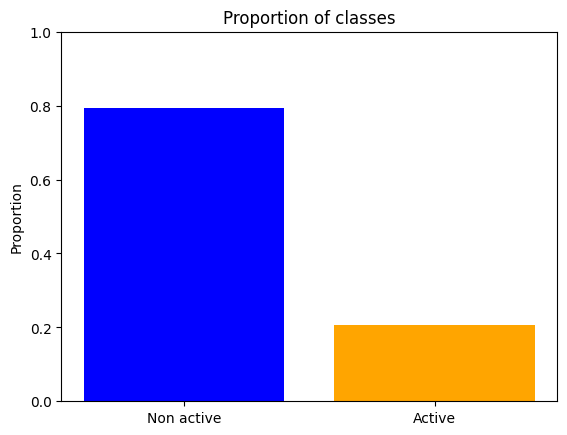

In [4]:
plot_zero_non_zero_proportions('../../../results_scbasset/enhancer_promotor_final/processed/not_filtered/ad.h5ad')

<div style="font-size: 100px; line-height: 1.5; width: auto; overflow-wrap: break-word;">
    Tutorial
</div>

# Binary cross entropy

## AUC and Loss

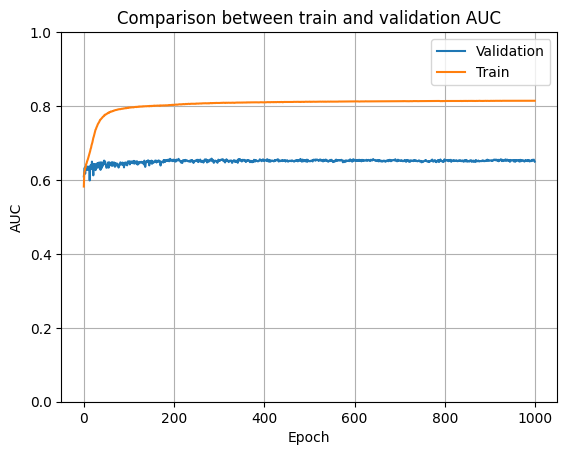

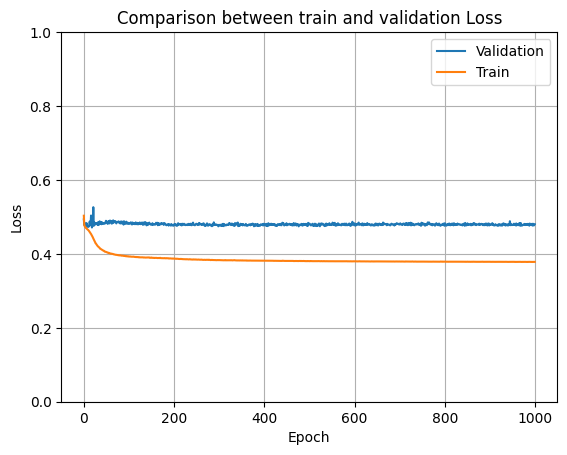

In [14]:
path = '../../../scBasset/examples/PBMC_multiome/visualisation_data/binary_cross_entropy'

title_AUC = "Comparison between train and validation AUC"
y_label_AUC = "AUC"
train_validation_comparison(f'{path}/AUC_validation_tutorial.csv', f'{path}/AUC_train_tutorial.csv', title_AUC, y_label_AUC)

title_loss = "Comparison between train and validation Loss"
y_label_loss= "Loss"
train_validation_comparison(f'{path}/Loss_validation_tutorial.csv', f'{path}/Loss_train_tutorial.csv', title_loss, y_label_loss)


# Binary focal loss

## AUC and Loss

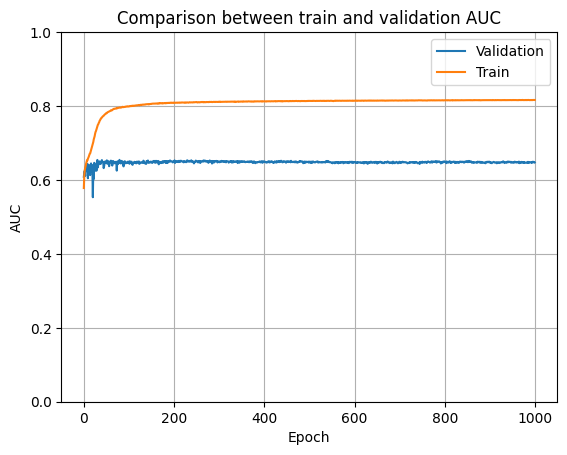

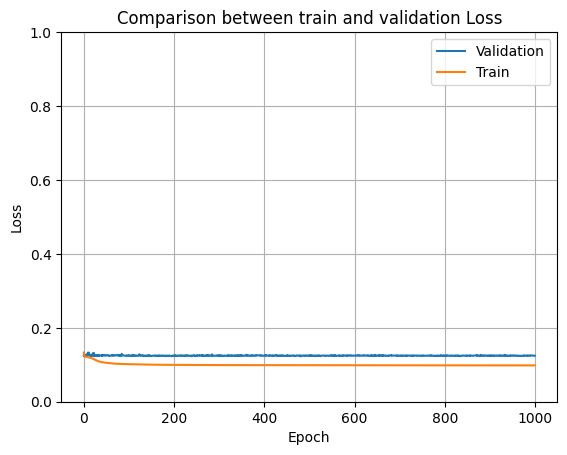

In [5]:
path = '../../../scBasset/examples/PBMC_multiome/visualisation_data/binary_focal_loss'

title_AUC = "Comparison between train and validation AUC"
y_label_AUC = "AUC"
train_validation_comparison(f'{path}/AUC_validation_tutorial.csv', f'{path}/AUC_train_tutorial.csv', title_AUC, y_label_AUC)

title_loss = "Comparison between train and validation Loss"
y_label_loss= "Loss"
train_validation_comparison(f'{path}/Loss_validation_tutorial.csv', f'{path}/Loss_train_tutorial.csv', title_loss, y_label_loss)


## Class 1 vs 0

Number of zeros: 58123131
Number of non-zero values: 15561969


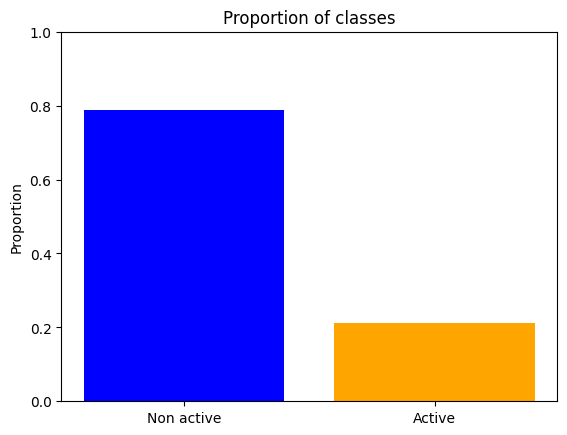

In [7]:
plot_zero_non_zero_proportions('processed/ad.h5ad')

## Epoch 1 and epoch 1000 validation 

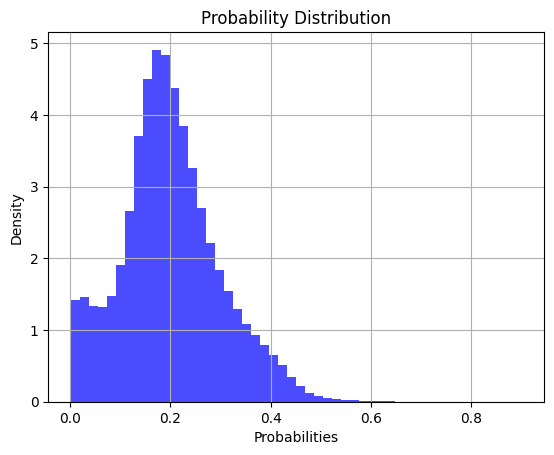

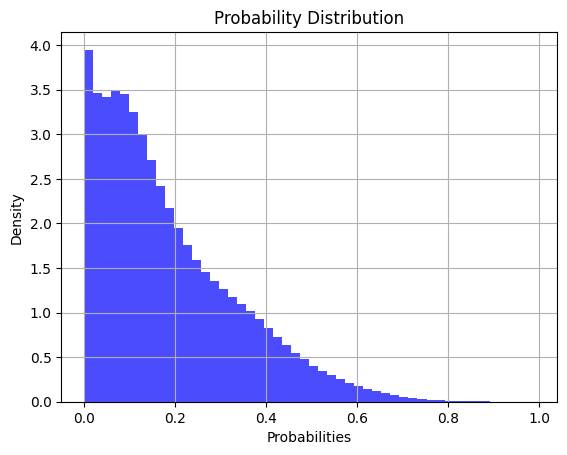

In [18]:
plot_probability_distribution(f'{path}/probabilities_tutorial_validation_epoch1.txt')
plot_probability_distribution(f'{path}/probabilities_tutorial_validation_epoch1000.txt')

<div style="font-size: 100px; line-height: 1.5; width: auto; overflow-wrap: break-word;">
    Enhancer
</div>

# Controle

In [20]:
path = '../../../results_scbasset/enhancer/controle/visualisation_data/'

# Binary focal loss (controle)

## Controle AUC and Loss

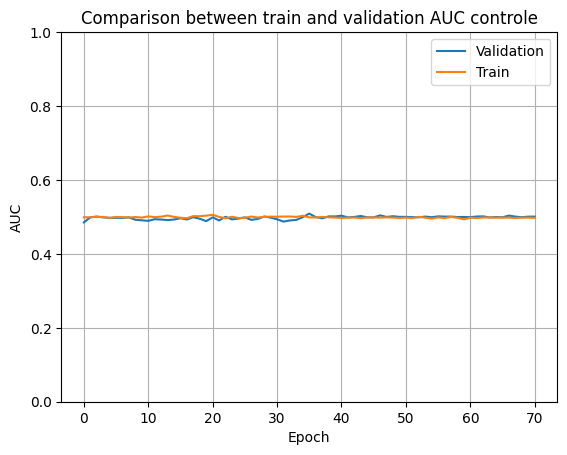

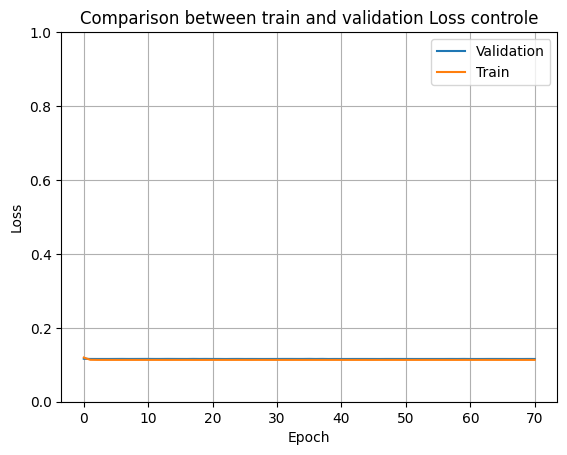

In [21]:
##### AUC ####
title_AUC = "Comparison between train and validation AUC controle"
y_label_AUC = "AUC"
train_validation_comparison(path + "binary_focal_loss/AUC_validation_controle_enhancer.csv", path + "binary_focal_loss/AUC_train_controle_enhancer.csv", title_AUC, y_label_AUC)

#### Loss ####
title_loss = "Comparison between train and validation Loss controle"
y_label_loss= "Loss"
train_validation_comparison(path + "binary_focal_loss/Loss_validation_controle_enhancer.csv", path + "binary_focal_loss/Loss_train_controle_enhancer.csv", title_loss, y_label_loss)

# Binary cross entropy (controle)

## Controle AUC and Loss

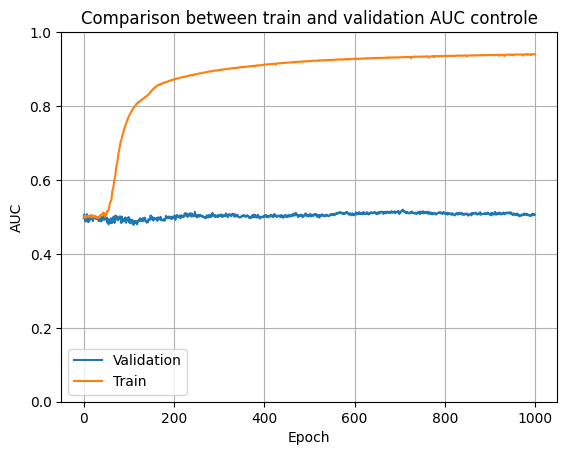

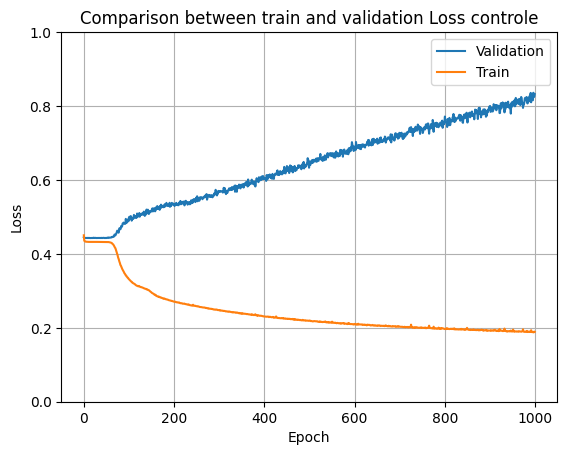

In [22]:
title_AUC = "Comparison between train and validation AUC controle"
y_label_AUC = "AUC"
train_validation_comparison(path + "binary_cross_entropy/AUC_validation_controle_enhancer.csv", path + "binary_cross_entropy/AUC_train_controle_enhancer.csv", title_AUC, y_label_AUC)

title_loss = "Comparison between train and validation Loss controle"
y_label_loss= "Loss"
train_validation_comparison(path + "binary_cross_entropy/Loss_validation_controle_enhancer.csv", path + "binary_cross_entropy/Loss_train_controle_enhancer.csv", title_loss, y_label_loss)

In [24]:
path = '../../../results_scbasset/enhancer/visualisation_data/'

## Class

Number of zeros: 3634347
Number of non-zero values: 742627


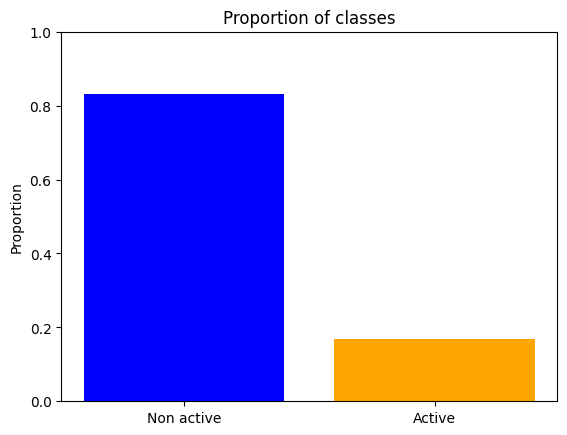

In [10]:
plot_zero_non_zero_proportions(path + '../processed/ad.h5ad')

## Epoch 1 and 1000 validation 

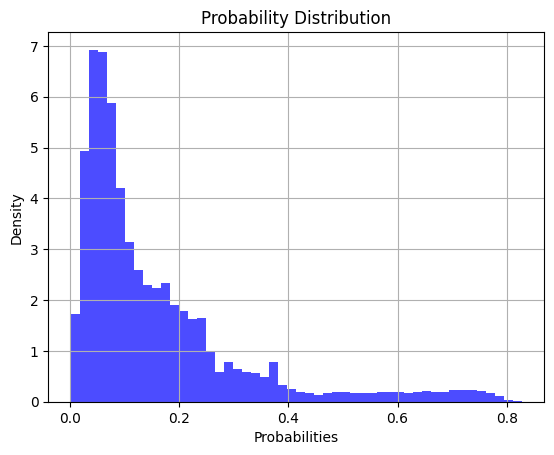

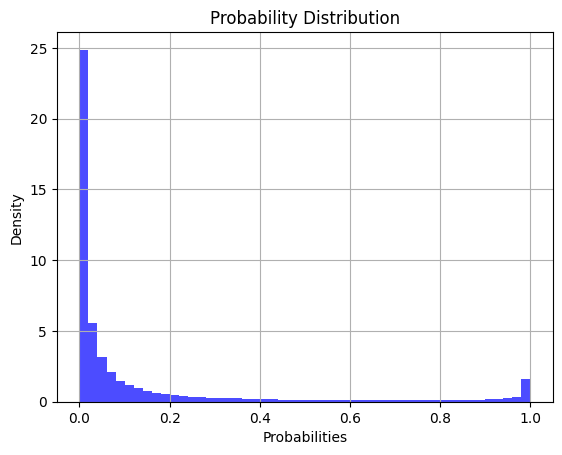

In [29]:
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_enhancer_validation_epoch1.txt')
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_enhancer_validation_epoch1000.txt')

<div style="font-size: 100px; line-height: 1.5; width: auto; overflow-wrap: break-word;">
    Promotor
</div>

In [3]:
path = '../../../results_scbasset/promotor/visualisation_data/'

## Class

Number of zeros: 638223
Number of non-zero values: 1658505


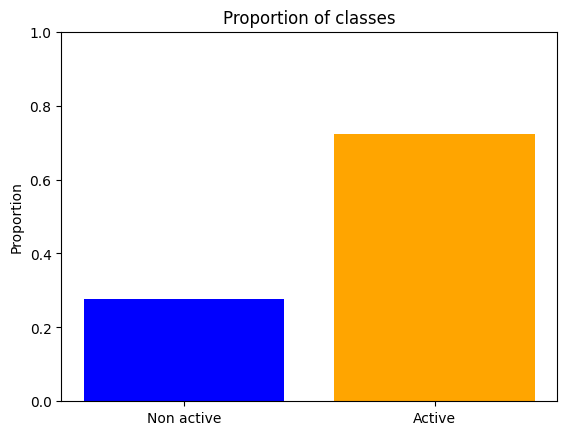

In [18]:
plot_zero_non_zero_proportions(path + '../processed/ad.h5ad')

## Epoch 1 and 1000 train 

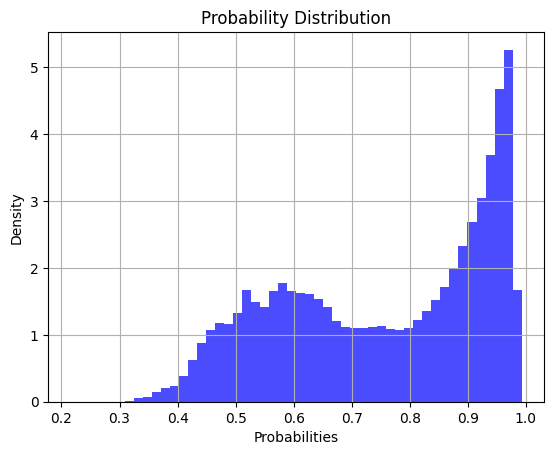

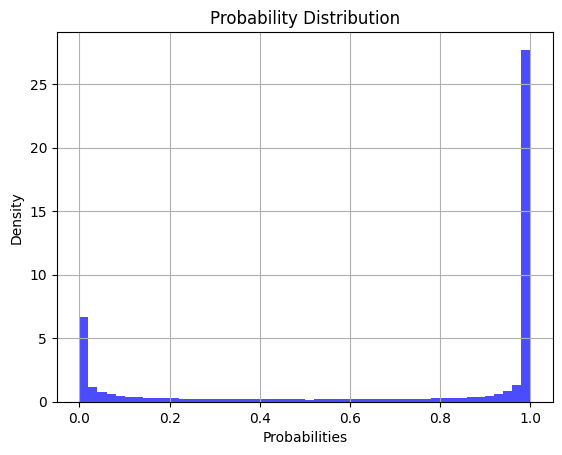

In [12]:
### epoch 1 ###
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_promotor_train_epoch1.txt')

### epoch 1000 ###
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_promotor_train_epoch1000.txt')

## Epoch 1 and 1000 validation 

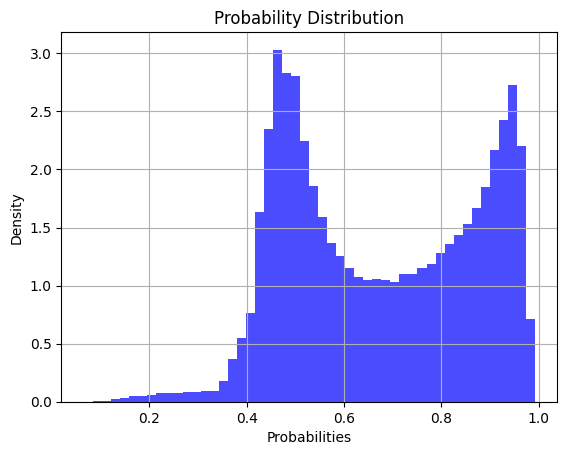

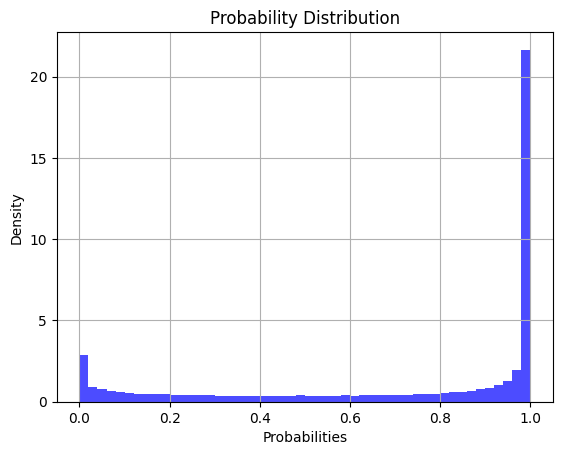

In [13]:
### epoch 1 ###
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_promotor_validation_epoch1.txt')

### epoch 2 ###
plot_probability_distribution(path + 'binary_cross_entropy/probabilities_promotor_validation_epoch1000.txt')